In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import scipy.stats as sps 
%matplotlib inline

In [2]:
KS=pd.read_csv("KS_FDR_AllVariables.csv")

In [3]:
data= pd.read_csv("Variables_Creation.csv")

In [4]:
data.head()

,Unnamed: 0,Recnum,Fraud,Amount,Card_Amount_mean_1D,Card_Amount_max_1D,Card_Amount_median_1D,Card_Amount_total_1D,Card_Amount_Act_mean_1D,Card_Amount_Act_max_1D,...,v_amount_merch_num_merch30,v_amount_merch_num_card7,v_amount_merch_num_card14,v_amount_merch_num_card30,v_amount_card_num_merch7,v_amount_card_num_merch14,v_amount_card_num_merch30,v_amount_card_num_card7,v_amount_card_num_card14,v_amount_card_num_card30
0,0,1,0,3.62,39.87,39.87,39.87,39.87,1.0,1.0,...,116.585294,84.082727,168.165455,360.354545,8.208529,16.417059,35.179412,25.371818,50.743636,108.736364
1,1,2,0,31.42,31.42,31.42,31.42,31.42,1.0,1.0,...,942.600000,219.940000,439.880000,942.600000,219.940000,439.880000,942.600000,219.940000,439.880000,942.600000
2,2,3,0,178.49,178.49,178.49,178.49,178.49,1.0,1.0,...,5354.700000,1249.430000,2498.860000,5354.700000,1249.430000,2498.860000,5354.700000,1249.430000,2498.860000,5354.700000
3,3,4,0,3.62,26.12,26.12,26.12,26.12,1.0,1.0,...,116.585294,132.130000,264.260000,566.271429,5.377647,10.755294,23.047059,26.120000,52.240000,111.942857
4,4,5,0,3.62,39.87,39.87,39.87,39.87,1.0,1.0,...,116.585294,84.082727,168.165455,360.354545,8.208529,16.417059,35.179412,25.371818,50.743636,108.736364


In [5]:
KS.tail(20)

,field,ks,FDR,rank_ks,rank_FDR,average_rank
261,Merch_Amount_Act_median_1D,0.0,0.013636,10.5,26.5,18.5
262,Card_State_Amount_Act_median_1D,0.0,0.013636,10.5,26.5,18.5
263,Card_Zip_Amount_Act_median_1D,0.0,0.013636,10.5,26.5,18.5
264,Card_Merch_Amount_Act_mean_1D,0.0,0.013636,10.5,26.5,18.5
265,Card_Amount_Act_mean_1D,0.0,0.013636,10.5,26.5,18.5
266,Card_Merch_Amount_Act_max_1D,0.0,0.013636,10.5,26.5,18.5
267,Merch_Amount_Act_max_1D,0.0,0.013636,10.5,26.5,18.5
268,Card_State_Amount_Act_max_1D,0.0,0.013636,10.5,26.5,18.5
269,Card_Amount_Act_median_1D,0.0,0.013636,10.5,26.5,18.5
270,Merch_Amount_Act_total_1D,0.0,0.013636,10.5,26.5,18.5


In [6]:
KS.reset_index(drop=True)

,field,ks,FDR,rank_ks,rank_FDR,average_rank
0,Fraud,1.000000,1.000000,281.0,281.0,281.00
1,Card_Zip_Amount_total_7D,0.698802,0.643182,279.0,280.0,279.50
2,Card_Merch_Amount_total_7D,0.695601,0.636364,276.0,279.0,277.50
3,Card_Merch_Amount_total_14D,0.693672,0.628409,274.0,277.0,275.50
4,Card_Zip_Amount_max_14D,0.699655,0.612500,280.0,271.0,275.50
5,Card_Merch_Amount_max_14D,0.696251,0.612500,277.0,271.0,274.00
6,Card_Zip_Amount_total_3D,0.692113,0.627273,272.0,275.5,273.75
7,Card_Merch_Amount_max_7D,0.692474,0.619318,273.0,274.0,273.50
8,Card_Zip_Amount_total_14D,0.693768,0.612500,275.0,271.0,273.00
9,Card_Zip_Amount_max_7D,0.697779,0.610227,278.0,268.0,273.00


In [7]:
nvars=len(KS)
num_keep=round(nvars/5*2)
num_keep

112

In [8]:
KS['field']

0                                Fraud
1             Card_Zip_Amount_total_7D
2           Card_Merch_Amount_total_7D
3          Card_Merch_Amount_total_14D
4              Card_Zip_Amount_max_14D
5            Card_Merch_Amount_max_14D
6             Card_Zip_Amount_total_3D
7             Card_Merch_Amount_max_7D
8            Card_Zip_Amount_total_14D
9               Card_Zip_Amount_max_7D
10          Card_Merch_Amount_total_3D
11            Card_State_Amount_max_7D
12            Card_Merch_Amount_max_3D
13          Card_State_Amount_total_7D
14           Card_Merch_Amount_max_30D
15              Card_Zip_Amount_max_3D
16          Card_State_Amount_total_3D
17            Card_State_Amount_max_3D
18             Card_Zip_Amount_max_30D
19          Card_Merch_Amount_total_1D
20            Card_Merch_Amount_max_1D
21         Card_Merch_Amount_median_1D
22           Card_Merch_Amount_mean_1D
23           Card_Merch_Amount_mean_3D
24             Card_Zip_Amount_mean_7D
25             Card_Zip_A

In [9]:
cols_keep=list(KS['field'][1:num_keep])
type(cols_keep)

list

In [10]:
cols_keep

['Card_Zip_Amount_total_7D',
 'Card_Merch_Amount_total_7D',
 'Card_Merch_Amount_total_14D',
 'Card_Zip_Amount_max_14D',
 'Card_Merch_Amount_max_14D',
 'Card_Zip_Amount_total_3D',
 'Card_Merch_Amount_max_7D',
 'Card_Zip_Amount_total_14D',
 'Card_Zip_Amount_max_7D',
 'Card_Merch_Amount_total_3D',
 'Card_State_Amount_max_7D',
 'Card_Merch_Amount_max_3D',
 'Card_State_Amount_total_7D',
 'Card_Merch_Amount_max_30D',
 'Card_Zip_Amount_max_3D',
 'Card_State_Amount_total_3D',
 'Card_State_Amount_max_3D',
 'Card_Zip_Amount_max_30D',
 'Card_Merch_Amount_total_1D',
 'Card_Merch_Amount_max_1D',
 'Card_Merch_Amount_median_1D',
 'Card_Merch_Amount_mean_1D',
 'Card_Merch_Amount_mean_3D',
 'Card_Zip_Amount_mean_7D',
 'Card_Zip_Amount_mean_3D',
 'Card_State_Amount_mean_7D',
 'Card_State_Amount_max_14D',
 'Card_Zip_Amount_median_1D',
 'Card_Zip_Amount_mean_1D',
 'Card_Zip_Amount_total_1D',
 'Card_Zip_Amount_max_1D',
 'Card_State_Amount_total_14D',
 'Card_Merch_Amount_median_3D',
 'Card_Merch_Amount_mean

In [11]:
cols_keep.insert(0,'Fraud')
cols_keep.insert(0,'Recnum')
cols_keep

['Recnum',
 'Fraud',
 'Card_Zip_Amount_total_7D',
 'Card_Merch_Amount_total_7D',
 'Card_Merch_Amount_total_14D',
 'Card_Zip_Amount_max_14D',
 'Card_Merch_Amount_max_14D',
 'Card_Zip_Amount_total_3D',
 'Card_Merch_Amount_max_7D',
 'Card_Zip_Amount_total_14D',
 'Card_Zip_Amount_max_7D',
 'Card_Merch_Amount_total_3D',
 'Card_State_Amount_max_7D',
 'Card_Merch_Amount_max_3D',
 'Card_State_Amount_total_7D',
 'Card_Merch_Amount_max_30D',
 'Card_Zip_Amount_max_3D',
 'Card_State_Amount_total_3D',
 'Card_State_Amount_max_3D',
 'Card_Zip_Amount_max_30D',
 'Card_Merch_Amount_total_1D',
 'Card_Merch_Amount_max_1D',
 'Card_Merch_Amount_median_1D',
 'Card_Merch_Amount_mean_1D',
 'Card_Merch_Amount_mean_3D',
 'Card_Zip_Amount_mean_7D',
 'Card_Zip_Amount_mean_3D',
 'Card_State_Amount_mean_7D',
 'Card_State_Amount_max_14D',
 'Card_Zip_Amount_median_1D',
 'Card_Zip_Amount_mean_1D',
 'Card_Zip_Amount_total_1D',
 'Card_Zip_Amount_max_1D',
 'Card_State_Amount_total_14D',
 'Card_Merch_Amount_median_3D',
 'C

In [12]:
vars_keep=data.filter(cols_keep, axis=1)
vars_keep.shape

(96397, 113)

In [26]:
vars_keep.head()

,Recnum,Fraud,Card_Zip_Amount_total_7D,Card_Merch_Amount_total_7D,Card_Merch_Amount_total_14D,Card_Zip_Amount_max_14D,Card_Merch_Amount_max_14D,Card_Zip_Amount_total_3D,Card_Merch_Amount_max_7D,Card_Zip_Amount_total_14D,...,Card_Amount_Act_median_30D,v_amount_merch_num_merch7,Merch_Amount_total_14D,v_amount_merch_num_merch14,v_amount_merch_num_merch30,v_num_merch_amount_card7,v_num_card_amount_card14,v_amount_merch_num_card30,v_num_merch_amount_merch14,Merch_Amount_median_14D
0,1,0,39.87,39.87,39.87,39.87,39.87,39.87,39.87,39.87,...,1.0,27.203235,132.13,54.406471,116.585294,5.969401,3.862553,360.354545,3.602513,132.13
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,1.0,219.940000,31.42,439.880000,942.600000,0.222788,0.445576,942.600000,0.445576,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,1.0,1249.430000,178.49,2498.860000,5354.700000,0.039218,0.078436,5354.700000,0.078436,178.49
3,4,0,26.12,26.12,26.12,26.12,26.12,26.12,26.12,26.12,...,1.0,27.203235,132.13,54.406471,116.585294,9.111792,3.751914,566.271429,3.602513,132.13
4,5,0,39.87,39.87,39.87,39.87,39.87,39.87,39.87,39.87,...,1.0,27.203235,132.13,54.406471,116.585294,5.969401,3.862553,360.354545,3.602513,132.13


## Drop first two weeks of data

In [31]:
vdata=vars_keep[vars_keep['Recnum']>=3345]

In [32]:
Y=vdata['Fraud']
vdata=vdata.drop(columns=['Recnum','Fraud'])

In [33]:
vdata.shape

(93059, 111)

## Feature Selection

In [15]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [16]:
%%time
model= LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=3, verbose=2, n_jobs=-1, scoring='roc_auc')
rfecv.fit(vdata,Y)

Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimato

In [18]:
print('Optimal number of feature:', rfecv.n_features_)

Optimal number of feature: 6


In [24]:
var_selected=pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), vdata.columns)),
                         columns=['ranking','variable'])
pd.options.display.max_rows = 150
print(var_selected)

     ranking                      variable
0          1    Card_Amount_Act_median_30D
1          1      Card_Merch_Amount_max_7D
2          1      v_num_card_amount_card14
3          1       v_num_card_amount_card7
4          1      v_num_merch_amount_card7
5          1    v_num_merch_amount_merch14
6          2     Card_Merch_Amount_max_30D
7          3     Card_State_Amount_max_30D
8          4     Card_State_Amount_max_14D
9          5          Card_Amount_mean_30D
10         6      Card_Zip_Amount_total_3D
11         7        Card_Zip_Amount_max_3D
12         8     Card_Zip_Amount_median_3D
13         9       Card_Zip_Amount_mean_3D
14        10        Card_Amount_median_14D
15        11   Card_Merch_Amount_median_7D
16        12    Card_State_Amount_mean_30D
17        13    Card_State_Amount_mean_14D
18        14       v_amount_card_num_card7
19        15    Card_Merch_Amount_mean_14D
20        16    Card_Merch_Amount_mean_30D
21        17  Card_Merch_Amount_median_30D
22        1

In [19]:
rfecv.ranking_

array([ 91,  29, 106,  31, 103,   6,   1,  28,  94,  97,  83,  25,  88,
         2,   7, 104,  82,  32,  68,  52,  51,  56,  19,  90,   9,  79,
         4,  53,  58,  66,  69,  45,  40,  54,   8,  43,  42,  87,  84,
        77,  36,  15,  33,  30,  62,  99,  13,  11,  98,  16,  59,  80,
        55,   3,  73,  71,  72,  41,  57,  17,  96,  93,  92,  18,  12,
        74,  38,  35, 105,  20,  85,  78,  67,  34,  46,  60,  37,  81,
        86,   5,  48,  39,  49,  95,  75,  44,  47,  24,  63,  50, 100,
        26,  76,  21,  65,  22,   1,  14,  70,  27,  10,   1,  64,  23,
        89, 101,   1,   1, 102,   1,  61])

In [21]:
rfecv.grid_scores_

array([0.80411848, 0.8165672 , 0.85366734, 0.85961382, 0.86032381,
       0.86508024, 0.7586995 , 0.81171139, 0.5889696 , 0.70097786,
       0.59101464, 0.43524239, 0.38742258, 0.35739419, 0.34270821,
       0.36753884, 0.36772058, 0.43677544, 0.48390812, 0.47885818,
       0.48750194, 0.51467334, 0.50181387, 0.49764118, 0.49637665,
       0.5193656 , 0.50700532, 0.50826045, 0.51632703, 0.5161794 ,
       0.5154403 , 0.51459727, 0.50503054, 0.49475885, 0.50348607,
       0.49984348, 0.48435136, 0.49393845, 0.50572677, 0.48513031,
       0.50592433, 0.49929077, 0.49695411, 0.49381142, 0.48098988,
       0.50911048, 0.49604961, 0.51306976, 0.49821126, 0.50169512,
       0.50785131, 0.50802704, 0.5165897 , 0.51051909, 0.53350461,
       0.53299165, 0.52475173, 0.53756405, 0.53795416, 0.52258079,
       0.54035166, 0.53000001, 0.5412778 , 0.53789472, 0.53830172,
       0.50942019, 0.51910464, 0.53800672, 0.51122585, 0.51382605,
       0.52663674, 0.53729006, 0.54638135, 0.54077318, 0.53867

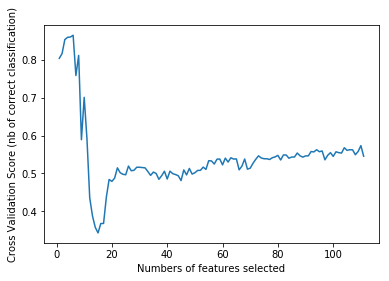

In [22]:
plt.figure()
plt.xlabel("Numbers of features selected")
plt.ylabel("Cross Validation Score (nb of correct classification)")
plt.plot(range(1,len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)

In [35]:
var_selected.drop([69])

,ranking,variable
0,1,Card_Amount_Act_median_30D
1,1,Card_Merch_Amount_max_7D
2,1,v_num_card_amount_card14
3,1,v_num_card_amount_card7
4,1,v_num_merch_amount_card7
5,1,v_num_merch_amount_merch14
6,2,Card_Merch_Amount_max_30D
7,3,Card_State_Amount_max_30D
8,4,Card_State_Amount_max_14D
9,5,Card_Amount_mean_30D


In [36]:
var_selected.reset_index(drop=True)
var_selected

,ranking,variable
0,1,Card_Amount_Act_median_30D
1,1,Card_Merch_Amount_max_7D
2,1,v_num_card_amount_card14
3,1,v_num_card_amount_card7
4,1,v_num_merch_amount_card7
5,1,v_num_merch_amount_merch14
6,2,Card_Merch_Amount_max_30D
7,3,Card_State_Amount_max_30D
8,4,Card_State_Amount_max_14D
9,5,Card_Amount_mean_30D


In [ ]:
num_keep2=

In [44]:
cols_keep=list(var_selected['variable'])[0:20]
cols_keep

['Card_Amount_Act_median_30D',
 'Card_Merch_Amount_max_7D',
 'v_num_card_amount_card14',
 'v_num_card_amount_card7',
 'v_num_merch_amount_card7',
 'v_num_merch_amount_merch14',
 'Card_Merch_Amount_max_30D',
 'Card_State_Amount_max_30D',
 'Card_State_Amount_max_14D',
 'Card_Amount_mean_30D',
 'Card_Zip_Amount_total_3D',
 'Card_Zip_Amount_max_3D',
 'Card_Zip_Amount_median_3D',
 'Card_Zip_Amount_mean_3D',
 'Card_Amount_median_14D',
 'Card_Merch_Amount_median_7D',
 'Card_State_Amount_mean_30D',
 'Card_State_Amount_mean_14D',
 'v_amount_card_num_card7',
 'Card_Merch_Amount_mean_14D']

In [38]:
cols_keep.insert(0,'Fraud')
cols_keep.insert(0,'Recnum')
finaldata=data.filter(cols_keep, axis=1)

In [40]:
finaldata.shape

(96397, 22)

In [71]:
finaldata.head(10)

,Recnum,Fraud,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,...,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
0,1,0,1.0,39.87,3.862553,1.931277,5.969401,3.602513,39.87,39.87,...,39.87,39.87,39.87,39.87,39.87,39.87,39.87,39.87,25.371818,39.87
1,2,0,1.0,31.42,0.445576,0.222788,0.222788,0.445576,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,219.940000,31.42
2,3,0,1.0,178.49,0.078436,0.039218,0.039218,0.078436,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,1249.430000,178.49
3,4,0,1.0,26.12,3.751914,1.875957,9.111792,3.602513,26.12,26.12,...,26.12,26.12,26.12,26.12,26.12,26.12,26.12,26.12,26.120000,26.12
4,5,0,1.0,39.87,3.862553,1.931277,5.969401,3.602513,39.87,39.87,...,39.87,39.87,39.87,39.87,39.87,39.87,39.87,39.87,25.371818,39.87
5,6,0,1.0,3.67,3.814714,1.907357,64.850136,3.602513,3.67,3.67,...,3.67,3.67,3.67,3.67,3.67,3.67,3.67,3.67,25.690000,3.67
6,7,0,1.0,3.62,3.867403,1.933702,65.745856,3.602513,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,25.340000,3.62
7,8,0,1.0,230.32,0.021309,0.010655,0.005327,0.060785,230.32,230.32,...,230.32,230.32,230.32,230.32,1313.97,230.32,230.32,230.32,4598.895000,230.32
8,9,0,1.0,62.11,0.225407,0.112703,0.112703,0.225407,62.11,62.11,...,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,434.770000,62.11
9,10,0,1.0,39.87,3.862553,1.931277,5.969401,3.602513,39.87,39.87,...,39.87,39.87,39.87,39.87,39.87,39.87,39.87,39.87,25.371818,39.87


In [72]:
finaldata.to_csv('vars_final.csv',index=False)

## Z scale 20 variables we selected

In [63]:
cols = list(finaldata.columns)
cols.remove('Recnum')
cols.remove('Fraud')
cols

['Card_Amount_Act_median_30D',
 'Card_Merch_Amount_max_7D',
 'v_num_card_amount_card14',
 'v_num_card_amount_card7',
 'v_num_merch_amount_card7',
 'v_num_merch_amount_merch14',
 'Card_Merch_Amount_max_30D',
 'Card_State_Amount_max_30D',
 'Card_State_Amount_max_14D',
 'Card_Amount_mean_30D',
 'Card_Zip_Amount_total_3D',
 'Card_Zip_Amount_max_3D',
 'Card_Zip_Amount_median_3D',
 'Card_Zip_Amount_mean_3D',
 'Card_Amount_median_14D',
 'Card_Merch_Amount_median_7D',
 'Card_State_Amount_mean_30D',
 'Card_State_Amount_mean_14D',
 'v_amount_card_num_card7',
 'Card_Merch_Amount_mean_14D']

In [73]:
zsvar=finaldata.copy()

In [55]:
from scipy.stats import zscore

In [74]:
## z scale 20 variables we selected
for col in cols:
    zsvar[col]=zscore(zsvar[col],axis=None)

In [75]:
zsvar.head()

,Recnum,Fraud,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,...,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
0,1,0,-0.120119,-0.158959,5.871008,4.898253,0.501112,5.898894,-0.175484,-0.231773,...,-0.127423,-0.156257,-0.188153,-0.188405,-0.245421,-0.188017,-0.194931,-0.196986,-0.472119,-0.187477
1,2,0,-0.120119,-0.160996,0.518050,0.338047,-0.096451,0.551609,-0.177512,-0.233739,...,-0.128918,-0.158296,-0.190803,-0.191053,-0.248927,-0.190735,-0.197738,-0.199734,-0.411548,-0.190208
2,3,0,-0.120119,-0.125551,-0.057104,-0.151928,-0.115540,-0.070261,-0.142209,-0.199517,...,-0.102904,-0.122819,-0.144685,-0.144963,-0.187902,-0.143425,-0.148884,-0.151906,-0.091059,-0.142679
3,4,0,-0.120119,-0.162273,5.697684,4.750597,0.827875,5.898894,-0.178785,-0.234972,...,-0.129855,-0.159574,-0.192465,-0.192714,-0.251127,-0.192440,-0.199498,-0.201458,-0.471886,-0.191920
4,5,0,-0.120119,-0.158959,5.871008,4.898253,0.501112,5.898894,-0.175484,-0.231773,...,-0.127423,-0.156257,-0.188153,-0.188405,-0.245421,-0.188017,-0.194931,-0.196986,-0.472119,-0.187477


In [76]:
zsvar.describe()

,Recnum,Fraud,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,...,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
count,96397.000000,96397.000000,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,...,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04
mean,48365.481820,0.010986,-3.851605e-15,4.122044e-16,-5.426528e-17,7.275942e-16,2.612905e-16,-2.323367e-16,5.251480e-16,-1.373197e-15,...,-2.289388e-17,4.238443e-17,-5.007446e-17,3.592962e-17,1.728748e-16,-5.371421e-16,2.139808e-16,-1.462108e-17,4.968057e-16,1.859280e-16
std,27945.003883,0.104236,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,1.000000,0.000000,-1.602108e-01,-1.685661e-01,-1.799097e-01,-2.565460e-01,-1.196153e-01,-2.029367e-01,-1.850524e-01,-2.410479e-01,...,-1.344737e-01,-1.658727e-01,-2.006527e-01,-2.008964e-01,-2.619067e-01,-2.008388e-01,-2.081717e-01,-2.099490e-01,-4.799745e-01,-2.003584e-01
25%,24154.000000,0.000000,-1.339604e-01,-1.529269e-01,-1.699163e-01,-2.422233e-01,-1.191104e-01,-1.882145e-01,-1.657165e-01,-2.112844e-01,...,-1.229872e-01,-1.510180e-01,-1.830906e-01,-1.831116e-01,-2.167757e-01,-1.838090e-01,-1.809791e-01,-1.863081e-01,-4.318650e-01,-1.821898e-01
50%,48365.000000,0.000000,-1.173069e-01,-1.206074e-01,-1.560918e-01,-2.210939e-01,-1.179646e-01,-1.599156e-01,-1.262429e-01,-1.491373e-01,...,-9.910864e-02,-1.192341e-01,-1.429571e-01,-1.430198e-01,-1.421694e-01,-1.429393e-01,-1.228048e-01,-1.341141e-01,-2.992802e-01,-1.396057e-01
75%,72578.000000,0.000000,-5.963550e-02,-2.523935e-02,-1.049725e-01,-1.378196e-01,-1.113230e-01,-7.122865e-02,-1.704463e-02,1.689714e-02,...,-2.847226e-02,-2.718486e-02,-2.766618e-02,-2.779950e-02,1.356328e-03,-2.494944e-02,2.383937e-03,-5.316077e-03,3.478729e-02,-2.006508e-02
max,96753.000000,1.000000,1.722764e+02,5.224340e+01,1.564777e+02,1.332007e+02,5.144801e+01,1.392880e+02,5.201769e+01,5.036163e+01,...,5.410234e+01,5.229276e+01,4.787643e+01,4.784676e+01,2.917616e+01,4.911842e+01,5.072057e+01,4.964964e+01,5.508856e+01,4.934699e+01


In [77]:
zsvar.head()

,Recnum,Fraud,Card_Amount_Act_median_30D,Card_Merch_Amount_max_7D,v_num_card_amount_card14,v_num_card_amount_card7,v_num_merch_amount_card7,v_num_merch_amount_merch14,Card_Merch_Amount_max_30D,Card_State_Amount_max_30D,...,Card_Zip_Amount_total_3D,Card_Zip_Amount_max_3D,Card_Zip_Amount_median_3D,Card_Zip_Amount_mean_3D,Card_Amount_median_14D,Card_Merch_Amount_median_7D,Card_State_Amount_mean_30D,Card_State_Amount_mean_14D,v_amount_card_num_card7,Card_Merch_Amount_mean_14D
0,1,0,-0.120119,-0.158959,5.871008,4.898253,0.501112,5.898894,-0.175484,-0.231773,...,-0.127423,-0.156257,-0.188153,-0.188405,-0.245421,-0.188017,-0.194931,-0.196986,-0.472119,-0.187477
1,2,0,-0.120119,-0.160996,0.518050,0.338047,-0.096451,0.551609,-0.177512,-0.233739,...,-0.128918,-0.158296,-0.190803,-0.191053,-0.248927,-0.190735,-0.197738,-0.199734,-0.411548,-0.190208
2,3,0,-0.120119,-0.125551,-0.057104,-0.151928,-0.115540,-0.070261,-0.142209,-0.199517,...,-0.102904,-0.122819,-0.144685,-0.144963,-0.187902,-0.143425,-0.148884,-0.151906,-0.091059,-0.142679
3,4,0,-0.120119,-0.162273,5.697684,4.750597,0.827875,5.898894,-0.178785,-0.234972,...,-0.129855,-0.159574,-0.192465,-0.192714,-0.251127,-0.192440,-0.199498,-0.201458,-0.471886,-0.191920
4,5,0,-0.120119,-0.158959,5.871008,4.898253,0.501112,5.898894,-0.175484,-0.231773,...,-0.127423,-0.156257,-0.188153,-0.188405,-0.245421,-0.188017,-0.194931,-0.196986,-0.472119,-0.187477


In [78]:
zsvar.to_csv('vars_final_zscale.csv',index=False)